In [1]:
import json
from pprint import pprint
import pandas as pd
import numpy as np

In [2]:
data = []
with open('/home/julia/Загрузки/Telegram Desktop/552670aa4eae356bf4d0d11c.jsonl') as raw_data:
    for line in raw_data:
        data.append(json.loads(line))
#pprint(data)
df = pd.DataFrame(data)
df['created'] = pd.to_datetime(df['created'])
#df =  df.sort_values('created' )
#df['created'] = df.created.astype(str)
df['word'] = df.word.str.join(',')
print(type(df.get_value(3,'title')))
df['day'] = df.created.dt.day
df['hour'] = df.created.dt.hour
df['minute'] = df.created.dt.minute
df['date'] = df['day'].map(str) + "-" + df['hour'].map(str) + "-" + df['minute'].map(str)
#z = (np.unique(dff[['word']].values))
#z2 = len(sorted(set((",".join(z).split(",")))))
df

<class 'str'>


,created,language,source,text,title,url,word,day,hour,minute,date
0,2017-09-18 10:30:49,ru,Интерфакс газета,Москва. 18 сентября. INTERFAX.RU - Украинская ...,Украина нарастила закупки угля в ЮАР в преддве...,http://www.interfax.ru/world/579493,"угл,тонн,тыс,парт,юар,антрацит,объем,украин,дт...",18,10,30,18-10-30
1,2017-09-18 10:30:13,ru,Електронні Вісті,"В порт ""Южный"" прибыл балкер с 75 тыс. тонн ан...","В порт ""Южный"" прибыла партия угля из ЮАР – 75...",http://elvisti.com/node/209949,"тонн,тыс,антрацит,дтэк,парт,тэс,угл,южн,балкер...",18,10,30,18-10-30
2,2017-09-18 09:43:00,ru,Николаевские Известия,В Украину прибыло четвертое судно с антрацитом...,Импорт африканского угля в Украину продолжается,http://izvestia.nikolaev.ua/news/%d0%b8%d0%bc%...,"антрацит,дтэк,компан,африканск,импорт,угл,укра...",18,9,43,18-9-43
3,2017-09-18 09:43:06,ru,06277.com.ua Доброполье,20 сентября 2017 года подача воды будет остано...,20 сентября временно будет прекращена подача в...,https://www.06277.com.ua/news/1797454,"вод,подач,карловк,остановлен,добропольск,район...",18,9,43,18-9-43
4,2017-09-18 09:43:06,ru,NewsNetwork,18.09.2017 09:31\n\nПриоритетом столичных влас...,"Имущество и активы ""Киевэнерго"" должны вернуть...",https://newsnetwork.tv/news/imushestvo-i-aktiv...,"акц,киевэнерг,актив,имуществ,кличк,облэнерг,пр...",18,9,43,18-9-43
5,2017-09-18 10:02:48,ru,Trust.UA,В Украину прибыло четвертое судно Panamax Semi...,В Украину прибыла четвертая партия антрацита и...,http://www.trust.ua/news/146391-v-ukrainu-prib...,"прибыл,тонн,украин,антрацит,южн,порт,судн,тыс,...",18,10,2,18-10-2
6,2017-09-18 10:04:03,ru,UaProm,"В порт ""Южный"" (Одесская обл.) прибыл четверты...",Четвертое судно с углем из ЮАР для ДТЭК прибыл...,http://uaprom.info/news/160651-chetvertoe-sudn...,"дтэк,тыс,антрацит,украин,балкер,станц,тэс,юар,...",18,10,4,18-10-4
7,2017-09-18 10:15:17,ru,Транспорт,"В порт ""Южный"" (Одесская обл.) прибыл четверты...","Четвертое судно с углем из ЮАР для ТЭС ""ДТЭК"" ...",http://transport-journal.com/news/chetvertoe-s...,"дтэк,тонн,тыс,антрацит,тэс,украин,балкер,станц...",18,10,15,18-10-15
8,2017-09-18 10:20:05,ru,REGNUM,Судно доставило 80 тыс. тонн дефицитного угля\...,В одесский порт прибыл четвертый балкер с антр...,https://regnum.ru/news/economy/2323174.html,"тыс,тонн,украин,балкер,порт,южн,антрацит,судн,...",18,10,20,18-10-20
9,2017-09-18 09:55:19,ru,ЛІГАБізнесІнформ,В порт Южный прибыл балкер с 75 тыс. т антраци...,ДТЭК Ахметова получила четвертую партию угля и...,http://biz.liga.net/ekonomika/tek/novosti/3709...,"дтэк,тыс,антрацит,юар,тэс,угл,балкер,прибыл,гр...",18,9,55,18-9-55


Импортим документы,переводим в датафрейм,чтобы было удобно работать и приятно смотреть. Предобрабатываем ячейки времени и токенов для дальнейшей работы.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5, max_features=10000, ngram_range=(1, 2))
vz = vectorizer.fit_transform(df['word'])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']
#tfidf.sort_values(by=['tfidf'], ascending=True).head(30)

Переводим наши тексты в векторное пространство токенов,чтобы далее использовать меру этого пространства для оценки близости при кластеризации.

In [4]:
from sklearn.cluster import MiniBatchKMeans

num_clusters = 27
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)

Вот и первый кластеризатор: kmeans, которому скармливаем наше векторное представление.(для лучшего эффекта кластеризации стоит запустить несколько раз,так сказать ,дать возможность разогреться - совет из документации алгоритма в библиотеке)

In [5]:
for i, desc in enumerate(df.title):
    if(i < 295):
        if kmeans_clusters[i] == 9:
            print("Cluster " + str(kmeans_clusters[i]) + ": " + desc + 
                  "(distance: " + str(kmeans_distances[i][kmeans_clusters[i]]) + ")")
            print('---')

Cluster 9: Американский уголь: есть ли причины для ликования (ВИДЕО)(distance: 0.363559054862)
---
Cluster 9: Американське вугілля: причин для тріумфування не так й багато(distance: 0.483898759975)
---
Cluster 9: Американське вугілля: причин для тріумфування не так й багато(distance: 0.483898759975)
---
Cluster 9: Американське вугілля: причин для тріумфування не так й багато(distance: 0.690856276981)
---


Функция-костыль(зато очень наглядная),можно посмотреть,что попало в каждый из кластеров, не вывожу все кластеры подряд,потому что это никакой ценности не имеет,только место будет занимать,можно просто ввести парочку номеров кластеров и оценить их внутренний мир)

In [6]:
import lda
from sklearn.feature_extraction.text import CountVectorizer


In [7]:
import logging
logging.getLogger("lda").setLevel(logging.WARNING)

In [9]:
cvectorizer = CountVectorizer(min_df=4, max_features=10000, ngram_range=(1,2))
cvz = cvectorizer.fit_transform(df['word'])

n_topics = 35

n_iter = 2000
lda_model = lda.LDA(n_topics=n_topics, n_iter=n_iter)
X_topics = lda_model.fit_transform(cvz)


Используем похожий подход с векторным пространством, только теперь с помощью CountVectorizer, и скармливаем это LDA- хитрому алгоритму,который и сам может рассматриваться  как кластеризатор, но оказывается лучше его использовать для того чтобы выделить тематические фичи,а не кластеры.

In [12]:
from sklearn import preprocessing 
from functools import reduce
stand_df = preprocessing.scale(df['day'])
X_all  = np.hstack((X_topics,stand_df.reshape((X_topics.shape[0],1)) ))
kmeans1 = kmeans_model.fit(X_all)
kmeans_clusters1 = kmeans1.predict(X_all)
kmeans_distances1 = kmeans1.transform(X_all)
#print(kmeans_distances)
#print(kmeans_clusters)
d = dict()
l = 1


for i, desc in enumerate(df.title):
    #ar = reduce(lambda x1, x2: x1*x2, tuple(np.argwhere(kmeans_distances == np.min(kmeans_distances[i,]))[0]))
     # right
    if(i < 295):
        num = 8
        if kmeans_clusters1[i] == num:
            if l > kmeans_distances1[i][kmeans_clusters1[i]]:
                l = kmeans_distances1[i][kmeans_clusters1[i]]  
            d['Cluster' + str(kmeans_clusters1[i])] = "distance:  " + str(l)+ "   "+ df.iloc[i]['text']
            print("Cluster " + str(kmeans_clusters1[i]) + ": " + desc + 
                  "(distance: " + str(kmeans_distances1[i][kmeans_clusters1[i]]) + ")")
            print('---')
print("Cluster " + str(num) + "   " + str(d.get('Cluster' + str(num))))
#print(d)

Cluster 8: Киевэнерго завершило первый этап строительства энергоэффективного оборудования на ТЭЦ-6(distance: 0.129579127059)
---
Cluster 8: Киевэнерго завершило первый этап строительства уникального энергоэффективного оборудования на ТЭЦ-6 Новости компаний(distance: 0.129579127059)
---
Cluster 8: Киевэнерго завершило первый этап строительства уникального энергоэффективного оборудования на ТЭЦ-6 Новости компаний(distance: 0.129579127059)
---
Cluster 8: (distance: 0.357199722311)
---
Cluster 8: ​КИЕВЭНЕРГО завершило первый этап строительства уникального энергоэффективного оборудования на ТЭЦ-6(distance: 0.129579127059)
---
Cluster 8: КИЇВЕНЕРГО завершило перший етап будівництва унікального енергоефективного обладнання на ТЕЦ-6(distance: 0.0976739256437)
---
Cluster 8   distance:  0.0976739256437   15 вересня 2017
15:17

В рамках інвестиційної програми 2017 року КИЇВЕНЕРГО завершило перший етап будівництва конденсаційного економайзера на водогрійному котлі НАС-209 столичної ТЕЦ-6. За раху

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


Вот на этом этапе мы строим модель второго уровня,т.е. стандартизируем нашу матрицу с фичами из LDA и конкатенируем её со днём публикации статьи и опять скарпливаем это kmeans + приятный бонус: репрезентативный документ(правда совсем не pythonic way)

In [16]:
from sklearn.cluster import AffinityPropagation
af_pr_model = AffinityPropagation(damping=0.5, max_iter=1000, convergence_iter=5, preference=[-1,-2,-3,-4,-1,-0.7])
affin_m = af_pr_model.fit(X_all)
affin_m_clusters = af_pr_model.predict(X_all)
print(len(af_pr_model.cluster_centers_indices_))
print(affin_m_clusters)
for i, desc in enumerate(df.title):
    if(i < 295):
        if affin_m_clusters[i] == 4:
            print("Cluster " + str(affin_m_clusters[i]) + ": " + desc )
            print('---')

30
[ 2  1  2  2  8 20  1  1 20  1  2 20  0  2  9  8  2  0 21 18 20  1  9  1  2
  2  1  1  1  2  1 18 21  2  2  3 27  5  5  3  3  3  4  4  4 27 27  5  6  6
 12 19  6  6  6 12 19 12  2  7  7  7 18 18  9  2  8 18 18 21 21  9 25 27 27
 27 12 25 25  9 19 19 25 10 25 28 19 12 26 12 22 24 25 12 11 12 16 17 22 17
 13 25 25 26 12 12 25 26 26 14 24 25 14 14 26 14 24 23 27 15 15 29 15 29 15
 27 19 11 19 10 12 16 16 16 16 25 12 17 14 19  2  2 18  2 18 20  2  1 20  2
 21  2  2  2  0  2 21  9 18  8  2  1  1  0  9  1 18 18  1 21 18  1  0  2 21
 18 19 28 19 27 15 27 15 27  2 21  0 18  1  2  9  1  2  1  1  1  2 20  8  2
  2  1  2  9 20 20 18  2  2  2  2  0 20  2  2  9  1  9  1  1 21 21 18 20  9
  2 27 27 27 12 12 24 14 12 12 13 25 23 16 22 14 25 25 26 13 17 16 16 11 23
 23 16 23 23 16 16 24 24 14 14 17 25 13 16 25 25 22 23 17 14 17 11 25 14 11
 26 12 11 17 26 29 27 27 19 10 10 19 28 28 19 12 19 27 27 29]
Cluster 4: Ремонт Южнодонбасского водопровода
---
Cluster 4: Ремонт Южнодонбасского водопровода
---

Опять таки модель второго уровня.Алгоритм,который делает,что и требовалось в ТЗ. Самостоятельно выбирает количество кластеров в зависимости от связности damping и preference. Кажется preference можно очень классно настроить,но инфы необходимой пока что не нашла. 

In [14]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=0,algorithm='arpack')
svd_tfidf = svd.fit_transform(vz)
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)
tsne_lda = tsne_model.fit_transform(X_topics)
tsne_kmeans1 = tsne_model.fit_transform(kmeans_distances1)
tsne_kmeans = tsne_model.fit_transform(kmeans_distances)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 295 / 295
[t-SNE] Mean sigma: 0.538846
[t-SNE] KL divergence after 100 iterations with early exaggeration: 2.081058
[t-SNE] Error after 475 iterations: 2.081058
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 295 / 295
[t-SNE] Mean sigma: 0.261566
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.998677
[t-SNE] Error after 425 iterations: 1.998677
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 295 / 295
[t-SNE] Mean sigma: 0.311259
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.716225
[t-SNE] Error after 175 iterations: 1.716225
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditiona

Штука ,которая помогает плотить, уменьшает размерность матрицы

In [17]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook
colormap = np.array(["#6d8dca", "#69de53", "#723bca", "#c3e14c", "#c84dc9", "#68af4e", "#6e6cd5",
"#e3be38", "#4e2d7c", "#5fdfa8", "#d34690", "#3f6d31", "#d44427", "#7fcdd8", "#cb4053", "#5e9981",
"#803a62", "#9b9e39", "#c88cca", "#e1c37b", "#34223b", "#bdd8a3", "#6e3326", "#cfbdce", "#d07d3c",
"#52697d", "#7d6d33", "#d27c88", "#36422b", "#b68f79", "#7fff00", "#ffa500", "#ff1493", "#fac205"])

plot_kmeans = bp.figure(plot_width=700, plot_height=600, title="KMeans clustering of the news",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

In [18]:
kmeans_df1 = pd.DataFrame(tsne_kmeans1, columns=['x', 'y'])
kmeans_df1['cluster'] = kmeans_clusters1
kmeans_df1['text'] = df['text']
kmeans_df1['title'] = df['title']
kmeans_df1
kmeans_df1.to_csv('KMeans on LDA', sep='\t', encoding='utf-8')

In [19]:
kmeans_df = pd.DataFrame(tsne_kmeans, columns=['x', 'y'])
kmeans_df['cluster'] = kmeans_clusters
kmeans_df['text'] = df['text']
kmeans_df['title'] = df['title']
kmeans_df
kmeans_df.to_csv('KMeans', sep='\t', encoding='utf-8')

In [20]:
af_pr_df = pd.DataFrame()
af_pr_df['cluster'] = affin_m_clusters
af_pr_df['text'] = df.text
af_pr_df['title'] = df.title
af_pr_df
#af_pr_df.to_csv('Affinity on LDA', sep='\t', encoding='utf-8')

,cluster,text,title
0,2,Москва. 18 сентября. INTERFAX.RU - Украинская ...,Украина нарастила закупки угля в ЮАР в преддве...
1,1,"В порт ""Южный"" прибыл балкер с 75 тыс. тонн ан...","В порт ""Южный"" прибыла партия угля из ЮАР – 75..."
2,2,В Украину прибыло четвертое судно с антрацитом...,Импорт африканского угля в Украину продолжается
3,2,20 сентября 2017 года подача воды будет остано...,20 сентября временно будет прекращена подача в...
4,8,18.09.2017 09:31\n\nПриоритетом столичных влас...,"Имущество и активы ""Киевэнерго"" должны вернуть..."
5,20,В Украину прибыло четвертое судно Panamax Semi...,В Украину прибыла четвертая партия антрацита и...
6,1,"В порт ""Южный"" (Одесская обл.) прибыл четверты...",Четвертое судно с углем из ЮАР для ДТЭК прибыл...
7,1,"В порт ""Южный"" (Одесская обл.) прибыл четверты...","Четвертое судно с углем из ЮАР для ТЭС ""ДТЭК"" ..."
8,20,Судно доставило 80 тыс. тонн дефицитного угля\...,В одесский порт прибыл четвертый балкер с антр...
9,1,В порт Южный прибыл балкер с 75 тыс. т антраци...,ДТЭК Ахметова получила четвертую партию угля и...


In [21]:
plot_kmeans.scatter(x='x', y='y', 
                    color=colormap[kmeans_clusters1], 
                    source=kmeans_df1)
hover = plot_kmeans.select(dict(type=HoverTool))
hover.tooltips={"cluster": "@cluster", "title": "@title"}
show(plot_kmeans)

/usr/local/lib/python3.4/dist-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/usr/local/lib/python3.4/dist-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)


Строит красивую интерактивную штуку для kmeans на LDA

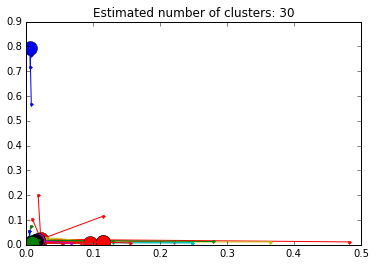

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import cycle

cluster_centers_indices = af_pr_model.cluster_centers_indices_
labels = af_pr_model.labels_
n_clusters_ = len(cluster_centers_indices)

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_all[cluster_centers_indices[k]]
    plt.plot(X_all[class_members, 0], X_all[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X_all[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Пытаюсь заплотить,что получилось по AffinityPropagation,но выглядит страннно.Надо над этим думать ещё.

<font color=red>В общем и целом есть над чем работать, презентовать проделанную работу,а верней проиллюстировать так и не получилось и собрать воедино репрезентативный документ и параметр связности в одном  алгоритме тоже уже не успелось. Есть желание ещё поработать над точностью алгоритмов. Да и вообще, это первый подобный опыт, за эту неделю узнала столько,сколько и подумать не могла узнать,когда получила это задание.Так что в любом случае,большое спасибо :)</font>
